In [165]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [167]:
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore'
]

In [168]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0             19183   3329.000000       

In [169]:
print(df[df.isna().any(axis=1)]) # Show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 35 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           

In [170]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['LoanApproved'] == 0]
minority_class = df[df['LoanApproved'] == 1]

# Undersample the majority class
majority_class_undersampled = resample(majority_class, 
                                       replace=False,
                                       n_samples=len(minority_class),
                                       random_state=42)

# Recombine the undersampled majority class with the minority class
df = pd.concat([majority_class_undersampled, minority_class])

# Check the distribution of the classes
print(df['LoanApproved'].value_counts())

LoanApproved
0    4780
1    4780
Name: count, dtype: int64


### Correlation

In [171]:
df = df.drop(columns=['ApplicationDate'])

df_encoded = pd.get_dummies(df, drop_first=True) # One-hot encoding categorical variables

# Point-Biserial Correlation for continuous features with binary target (LoanApproved)
point_biserial_correlations = {}

for column in numeric_columns:
    correlation, p_value = pointbiserialr(df_encoded[column], df_encoded['LoanApproved_1'])
    point_biserial_correlations[column] = correlation

# Chi-Square Test of Independence for categorical features with binary target (without LoanApproved)
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory'
]
chi_square_p_values = {}

encoded_columns = [col for col in df_encoded.columns if col not in categorical_columns]

for column in encoded_columns:
    contingency_table = pd.crosstab(df_encoded[column], df_encoded['LoanApproved_1'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_p_values[column] = p_value

In [172]:
# Convert the point-biserial correlation dictionary to a DataFrame
point_biserial_correlations_df = pd.DataFrame(list(point_biserial_correlations.items()), columns=['Feature', 'Correlation'])

# Print the resulting DataFrame
print("\nPoint-Biserial Correlation for continuous features:")
point_biserial_correlations_df


Point-Biserial Correlation for continuous features:


Feature  Correlation
0                         Age     0.167331
1                AnnualIncome     0.581686
2                 CreditScore     0.173091
3                  Experience     0.165917
4                  LoanAmount    -0.303687
5                LoanDuration    -0.116180
6          NumberOfDependents     0.007752
7         MonthlyDebtPayments    -0.092699
8   CreditCardUtilizationRate    -0.020635
9     NumberOfOpenCreditLines     0.009351
10    NumberOfCreditInquiries     0.007918
11          DebtToIncomeRatio    -0.004418
12       PreviousLoanDefaults    -0.081200
13      LengthOfCreditHistory     0.116242
14      SavingsAccountBalance     0.017026
15     CheckingAccountBalance     0.007236
16                TotalAssets     0.176120
17           TotalLiabilities    -0.036601
18              MonthlyIncome     0.588096
19                  JobTenure     0.002294
20                   NetWorth     0.178344
21           BaseInterestRate    -0.301202
22               InterestRate    -0.365499
23         MonthlyLoanPayment    -0.235809
24     TotalDebtToIncomeRatio    -0.537377
25                  RiskScore    -0.832373

In [173]:
# Convert the chi-square p-values dictionary to a DataFrame
chi_square_p_values_df = pd.DataFrame(list(chi_square_p_values.items()), columns=['Feature', 'P-Value'])

# Print the resulting DataFrame
print("\nChi-Square p-values:")
chi_square_p_values_df


Chi-Square p-values:


Feature       P-Value
0                 Age  1.509057e-42
1        AnnualIncome  1.176826e-02
2         CreditScore  1.150208e-18
3          Experience  1.612117e-42
4          LoanAmount  2.077344e-01
..                ...           ...
76  PaymentHistory_42  1.000000e+00
77  PaymentHistory_43  1.000000e+00
78  PaymentHistory_44  1.000000e+00
79  PaymentHistory_45  1.000000e+00
80     LoanApproved_1  0.000000e+00

[81 rows x 2 columns]

In [174]:
# Set significance level (alpha) for correlation
alpha = 0.05

# Filter features where the p-value is less than alpha (significantly correlated)
significant_features = chi_square_p_values_df[chi_square_p_values_df['P-Value'] < alpha]

# Print the significant features
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                           Feature       P-Value
0                              Age  1.509057e-42
1                     AnnualIncome  1.176826e-02
2                      CreditScore  1.150208e-18
3                       Experience  1.612117e-42
5                     LoanDuration  1.003712e-30
12            PreviousLoanDefaults  2.716102e-15
13           LengthOfCreditHistory  4.359962e-19
18                   MonthlyIncome  1.088174e-02
25                       RiskScore  0.000000e+00
26  EmploymentStatus_Self-Employed  1.817777e-03
27     EmploymentStatus_Unemployed  5.645314e-04
28         EducationLevel_Bachelor  1.572928e-06
29        EducationLevel_Doctorate  2.468004e-24
30      EducationLevel_High School  2.238769e-67
31           EducationLevel_Master  1.335883e-32
35       HomeOwnershipStatus_Other  1.446481e-02
37        HomeOwnershipStatus_Rent  4.406699e-03
38             BankruptcyHistory_1  1.144554e-22
42               LoanPurpose_

In [175]:
# Remove RiskScore since it is directly correlated and target
strings_to_drop = ['RiskScore', 'LoanApproved_1']
significant_features = significant_features[~significant_features['Feature'].isin(strings_to_drop)]

LoanApproved
0    4780
1    4780
Name: count, dtype: int64

LoanApproved
0    50.0
1    50.0
Name: count, dtype: float64


Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  \
10707   29         26030          585         Employed       Bachelor   
9363    41         21625          483         Employed      Associate   
15312   57         78939          569         Employed    High School   
5055    26         33649          546         Employed      Associate   
18237   61         42842          570         Employed       Bachelor   

       Experience  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
10707           8       20642            24       Married                   2   
9363           18       63536            36       Married                   1   
15312          34       31746            48        Single                   2   
5055            4       22496           108       Married                   1   
18237          38       22227            72       Widowed                   3   

       ... TotalLiabilities  MonthlyIncome  JobTenure  NetWorth  \
10707  ...           168722    2169.166667          3      4009   
9363   ...            26241    1802.083333          4      4061   
15312  ...            16837    6578.250000          6     31951   
5055   ...            10851    2804.083333          6     53435   
18237  ...             2848    3570.166667          6     40383   

       BaseInterestRate  InterestRate MonthlyLoanPayment  \
10707          0.203142      0.188165        1038.695486   
9363           0.307036      0.319326        2764.896774   
15312          0.242246      0.218378         997.399107   
5055           0.294496      0.308268         617.816947   
18237          0.252227      0.201782         534.697365   

      TotalDebtToIncomeRatio  LoanApproved RiskScore  
10707               0.657255             0      61.0  
9363                1.676891             0      52.0  
15312               0.203458             0      51.0  
5055                0.461048             0      48.0  
18237               0.233238             0      56.0  

[5 rows x 34 columns]

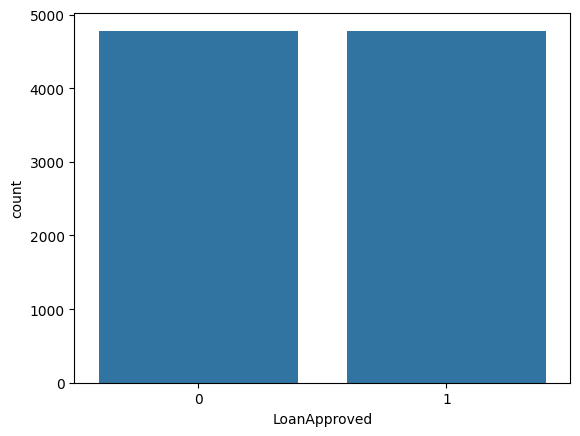

In [176]:
print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

### CART

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1'])     # Features
target = df_encoded['LoanApproved_1']                    # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test,target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.9832635983263598

 Confusion Matrix:
[[1154   17]
 [  23 1196]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      1171
        True       0.99      0.98      0.98      1219

    accuracy                           0.98      2390
   macro avg       0.98      0.98      0.98      2390
weighted avg       0.98      0.98      0.98      2390



In [178]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8640167364016736

 Confusion Matrix:
[[1015  156]
 [ 169 1050]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.86      1171
        True       0.87      0.86      0.87      1219

    accuracy                           0.86      2390
   macro avg       0.86      0.86      0.86      2390
weighted avg       0.86      0.86      0.86      2390



In [179]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.7514644351464436

 Confusion Matrix:
[[878 293]
 [301 918]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.75      0.75      1171
        True       0.76      0.75      0.76      1219

    accuracy                           0.75      2390
   macro avg       0.75      0.75      0.75      2390
weighted avg       0.75      0.75      0.75      2390



### C5.0

In [180]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

max_depth  max_leaf_nodes  accuracy
89         10              10  0.857322
62          7              10  0.857322
35          4              10  0.857322
53          6              10  0.857322
71          8              10  0.857322
..        ...             ...       ...
1           1               3  0.825105
46          6               3  0.825105
47          6               4  0.825105
54          7               2  0.825105
45          6               2  0.825105

[90 rows x 3 columns]

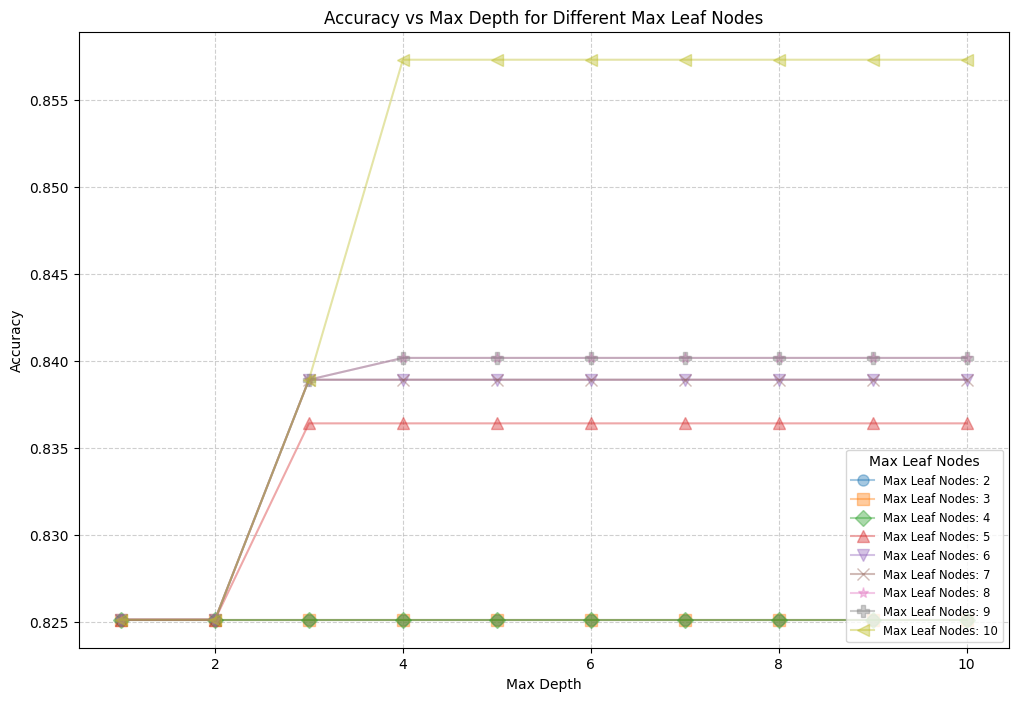

In [181]:
import matplotlib.pyplot as plt

# Define marker styles to differentiate each line
marker_styles = ['o', 's', 'D', '^', 'v', 'x', '*', 'P', '<', '>']

plt.figure(figsize=(12, 8))

# Loop through unique values of max_leaf_nodes
for idx, max_leaf_nodes in enumerate(results_df['max_leaf_nodes'].unique()):
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        marker=marker_styles[idx % len(marker_styles)],
        label=f"Max Leaf Nodes: {max_leaf_nodes}",
        alpha=0.4,
        linewidth=1.5,
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes", loc='lower right', fontsize='small')  # Adjust legend size
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter gridlines for better readability

# Show the plot
plt.show()

In [182]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth          4.000000
max_leaf_nodes    10.000000
accuracy           0.857322
Name: 35, dtype: float64


In [183]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8573221757322176

 Confusion Matrix:
[[ 946  225]
 [ 116 1103]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.81      0.85      1171
        True       0.83      0.90      0.87      1219

    accuracy                           0.86      2390
   macro avg       0.86      0.86      0.86      2390
weighted avg       0.86      0.86      0.86      2390



In [184]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5, 0.9, 'TotalDebtToIncomeRatio <= 0.222\nentropy = 1.0\nsamples = 7170\nvalue = [3609.0, 3561.0]'),
 Text(0.25, 0.7, 'TotalDebtToIncomeRatio <= 0.151\nentropy = 0.692\nsamples = 3658\nvalue = [679, 2979]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'InterestRate <= 0.254\nentropy = 0.434\nsamples = 2250\nvalue = [201, 2049]'),
 Text(0.0625, 0.3, 'entropy = 0.267\nsamples = 1760\nvalue = [80, 1680]'),
 Text(0.1875, 0.3, 'entropy = 0.806\nsamples = 490\nvalue = [121, 369]'),
 Text(0.375, 0.5, 'InterestRate <= 0.219\nentropy = 0.924\nsamples = 1408\nvalue = [478, 930]'),
 Text(0.3125, 0.3, 'entropy = 0.572\nsamples = 673\nvalue = [91, 582]'),
 Text(0.4375, 0.3, 'NetWorth <= 144739.5\nentropy = 0.998\nsamples = 735\nvalue = [387, 348]'),
 Text(0.375, 0.1, 'entropy = 0.96\nsamples = 586\nvalue = [362.0, 224.0]'),
 Text(0.5, 0.1, 'entropy = 0.653\nsamples = 149\nvalue = [25, 124]'),
 Text(0.75, 0.7, 'TotalDebtToIncomeRatio <= 0.363\nentropy = 0.648\nsamples = 3512\nvalue = [293

In [185]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

max_depth  max_leaf_nodes  accuracy
89         10              10  0.804184
25          3               9  0.804184
67          8               6  0.804184
31          4               6  0.804184
32          4               7  0.804184
..        ...             ...       ...
39          5               5  0.800000
1           1               3  0.800000
46          6               3  0.800000
47          6               4  0.800000
45          6               2  0.800000

[90 rows x 3 columns]

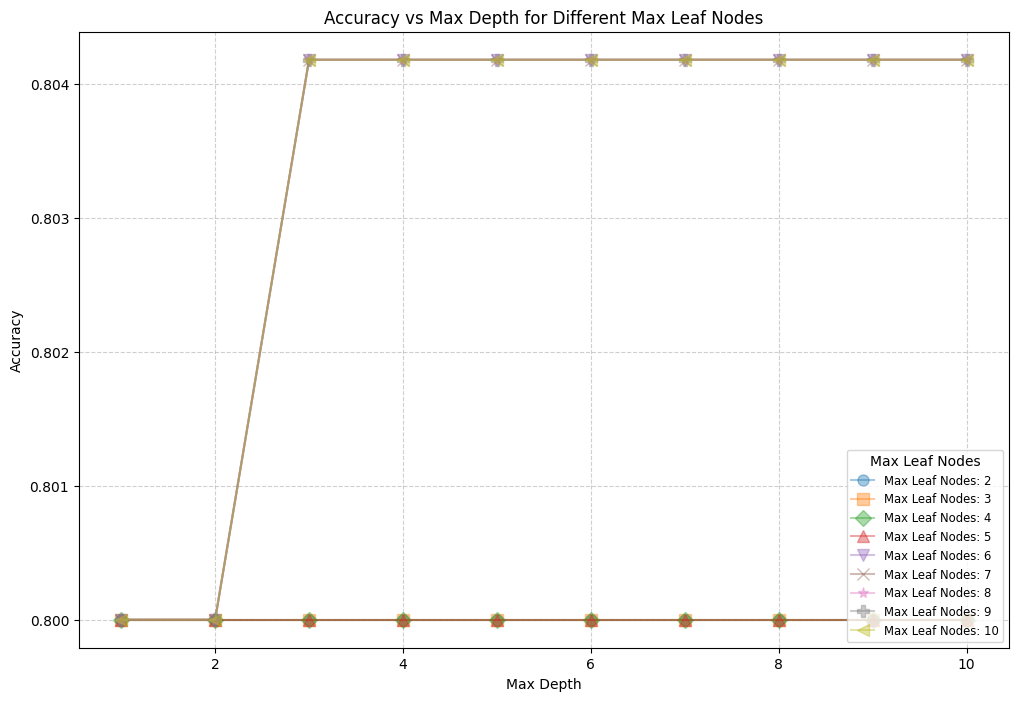

In [186]:
# Define marker styles to differentiate each line
marker_styles = ['o', 's', 'D', '^', 'v', 'x', '*', 'P', '<', '>']

plt.figure(figsize=(12, 8))

# Loop through unique values of max_leaf_nodes
for idx, max_leaf_nodes in enumerate(results_df['max_leaf_nodes'].unique()):
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        marker=marker_styles[idx % len(marker_styles)],
        label=f"Max Leaf Nodes: {max_leaf_nodes}",
        alpha=0.4,
        linewidth=1.5,
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes", loc='lower right', fontsize='small')  # Adjust legend size
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter gridlines for better readability

# Show the plot
plt.show()

In [187]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth         3.000000
max_leaf_nodes    6.000000
accuracy          0.804184
Name: 22, dtype: float64


In [188]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.80418410041841

 Confusion Matrix:
[[982 189]
 [279 940]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.84      0.81      1171
        True       0.83      0.77      0.80      1219

    accuracy                           0.80      2390
   macro avg       0.81      0.80      0.80      2390
weighted avg       0.81      0.80      0.80      2390



In [189]:
plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.4090909090909091, 0.875, 'MonthlyIncome <= 5073.875\nentropy = 1.0\nsamples = 7170\nvalue = [3609.0, 3561.0]'),
 Text(0.18181818181818182, 0.625, 'MonthlyIncome <= 3196.875\nentropy = 0.694\nsamples = 3493\nvalue = [2841, 652]'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'entropy = 0.329\nsamples = 1770\nvalue = [1663, 107]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.9\nsamples = 1723\nvalue = [1178, 545]'),
 Text(0.6363636363636364, 0.625, 'MonthlyIncome <= 7798.75\nentropy = 0.739\nsamples = 3677\nvalue = [768, 2909]'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'LoanDuration <= 78.0\nentropy = 0.92\nsamples = 1829\nvalue = [613, 1216]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.879\nsamples = 1603\nvalue = [478.0, 1125.0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.972\nsamples = 226\nvalue = [135, 91]'),
 Text(0.8181818181818182, 0.375, 'MonthlyIncome <= 11300.417\nentropy = 0.416\nsample

### Random Forest

In [190]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)


results = []
n_estimators = [10, 50, 100, 200, 500]

# Loop through values for n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=7)
    
    model.fit(attr_train,target_train)
    target_pred = model.predict(attr_test)

    results.append({
        "n_estimators": n,
        "accuracy": accuracy_score(target_test, target_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

n_estimators  accuracy
4           500  0.920084
2           100  0.916736
3           200  0.915900
1            50  0.912971
0            10  0.899582

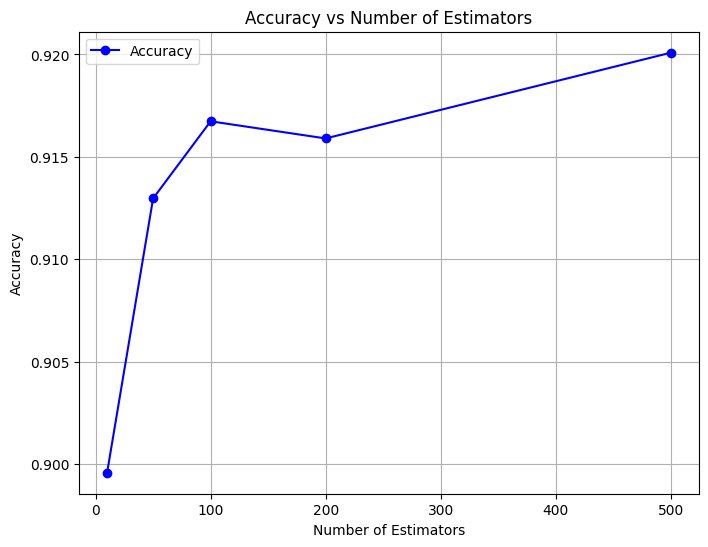

In [191]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [192]:
model = RandomForestClassifier(n_estimators=50, random_state=7)
    
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.9129707112970711

 Confusion Matrix:
[[1053  118]
 [  90 1129]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.90      0.91      1171
        True       0.91      0.93      0.92      1219

    accuracy                           0.91      2390
   macro avg       0.91      0.91      0.91      2390
weighted avg       0.91      0.91      0.91      2390



In [193]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")

# Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [1.37859743e-02 1.39253823e-01 1.71473589e-02 1.66117575e-02
 4.19798229e-02 1.37272334e-02 6.08140954e-03 1.67184727e-02
 1.30383308e-02 7.35588990e-03 5.14275109e-03 1.30686092e-02
 3.40125042e-03 1.89650986e-02 1.37169632e-02 1.35025735e-02
 3.45928207e-02 1.42953278e-02 1.75366280e-01 8.08221547e-03
 3.34471540e-02 3.41161370e-02 7.01179400e-02 3.18052408e-02
 1.83758978e-01 1.13344245e-03 1.93096792e-03 2.01772922e-03
 2.75288824e-03 6.67677436e-03 3.74386883e-03 1.87830023e-03
 2.32771129e-03 1.03794550e-03 1.46025735e-03 1.89923956e-03
 2.64803919e-03 4.27919407e-03 1.78915190e-03 1.43926405e-03
 2.29503095e-03 1.25097993e-03 4.88577633e-05 0.00000000e+00
 8.20033601e-06 1.11590916e-05 2.12852228e-04 2.39484400e-04
 7.26213534e-04 5.81387279e-04 1.04561345e-03 1.08943703e-03
 7.73309012e-04 1.09517802e-03 1.23857622e-03 1.48631982e-03
 1.17777684e-03 1.42255787e-03 1.10958635e-03 1.14936648e-03
 1.13383538e-03 1.04142880e-03 8.74675786e-04 7.23744508e-04


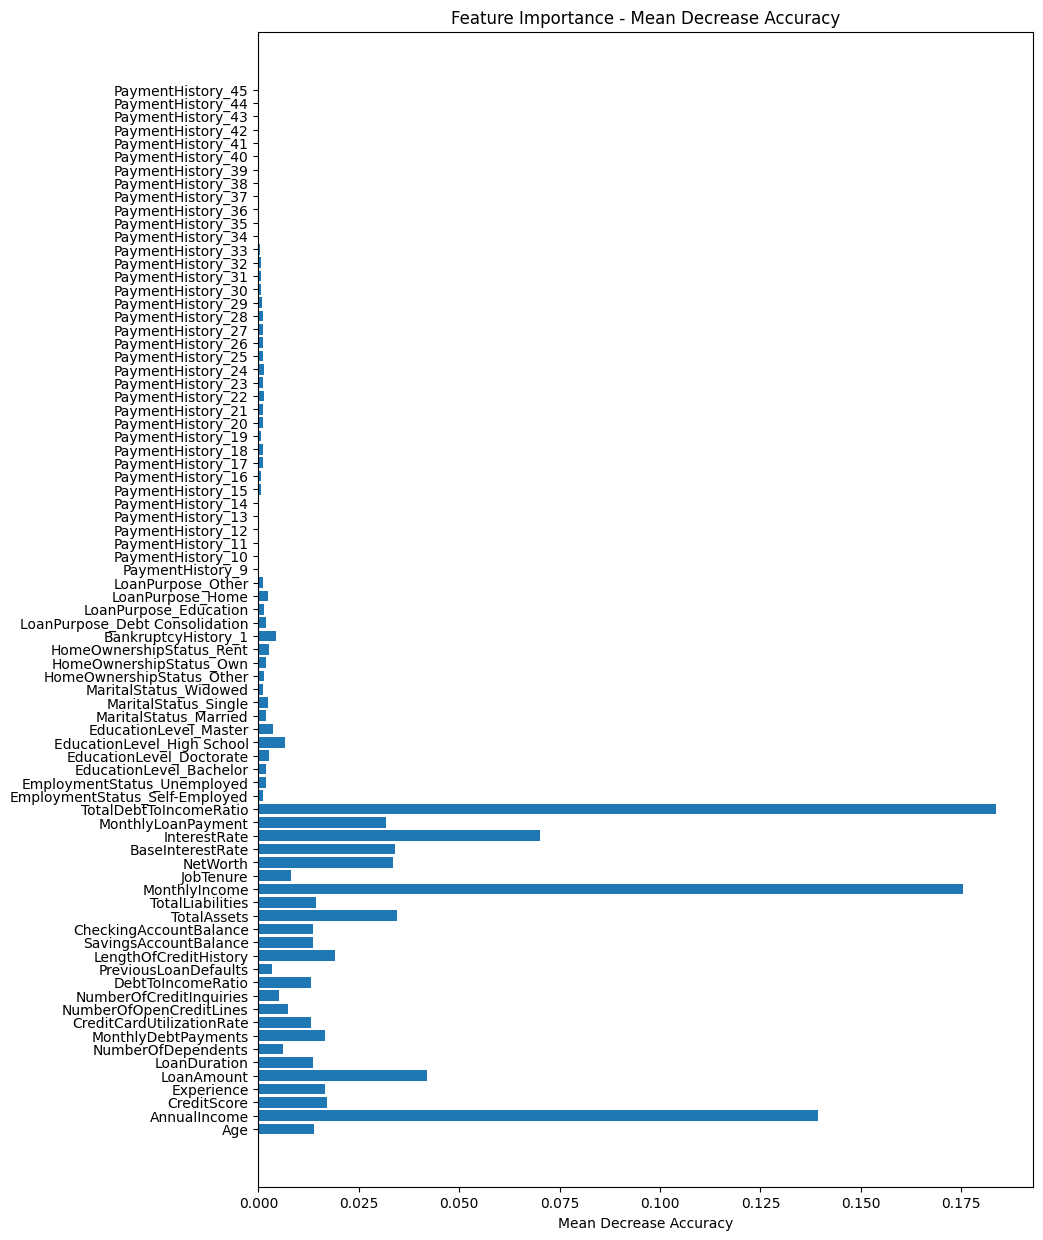

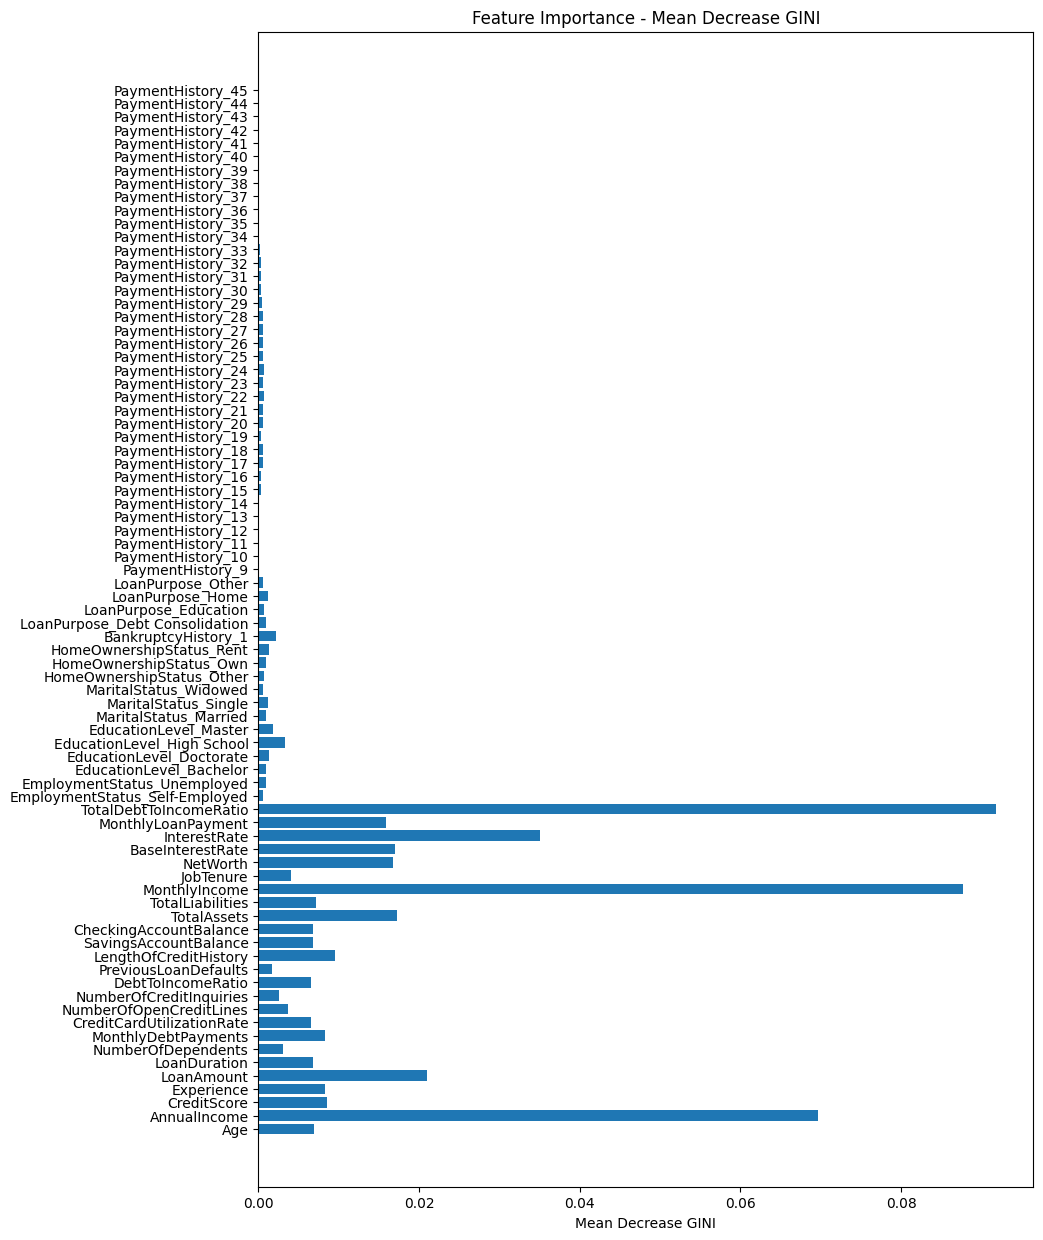

In [194]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 15))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [195]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []
n_estimators = [10, 50, 100, 200, 500]

# Loop through values for n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=7)
    
    model.fit(attr_train, target_train)
    target_pred = model.predict(attr_test)

    results.append({
        "n_estimators": n,
        "accuracy": accuracy_score(target_test, target_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

n_estimators  accuracy
3           200  0.825941
2           100  0.824686
4           500  0.823013
1            50  0.821339
0            10  0.809623

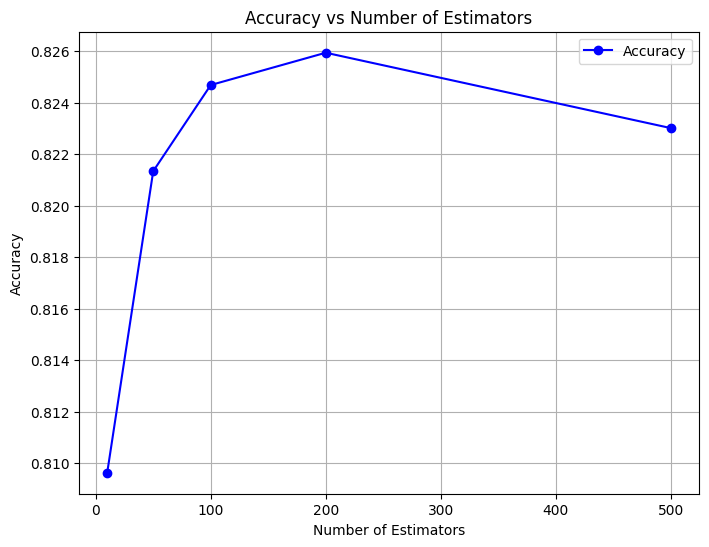

In [196]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [197]:
model = RandomForestClassifier(n_estimators=50, random_state=7)
    
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8213389121338912

 Confusion Matrix:
[[971 200]
 [227 992]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      1171
        True       0.83      0.81      0.82      1219

    accuracy                           0.82      2390
   macro avg       0.82      0.82      0.82      2390
weighted avg       0.82      0.82      0.82      2390



In [198]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")

# Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [0.06099486 0.29165575 0.07883538 0.0619222  0.05174614 0.0097078
 0.07122202 0.27758322 0.00620166 0.00602412 0.00929028 0.00667315
 0.01701542 0.00964038 0.00694701 0.01177976 0.00942683 0.00738626
 0.00468373 0.00126402]

Mean Decrease GINI: [0.03049418 0.14581234 0.03941349 0.0309578  0.02587031 0.00485338
 0.03560722 0.13877683 0.0031005  0.00301174 0.00464465 0.00333622
 0.0085068  0.00481968 0.00347314 0.00588925 0.00471291 0.00369274
 0.00234161 0.00063194]


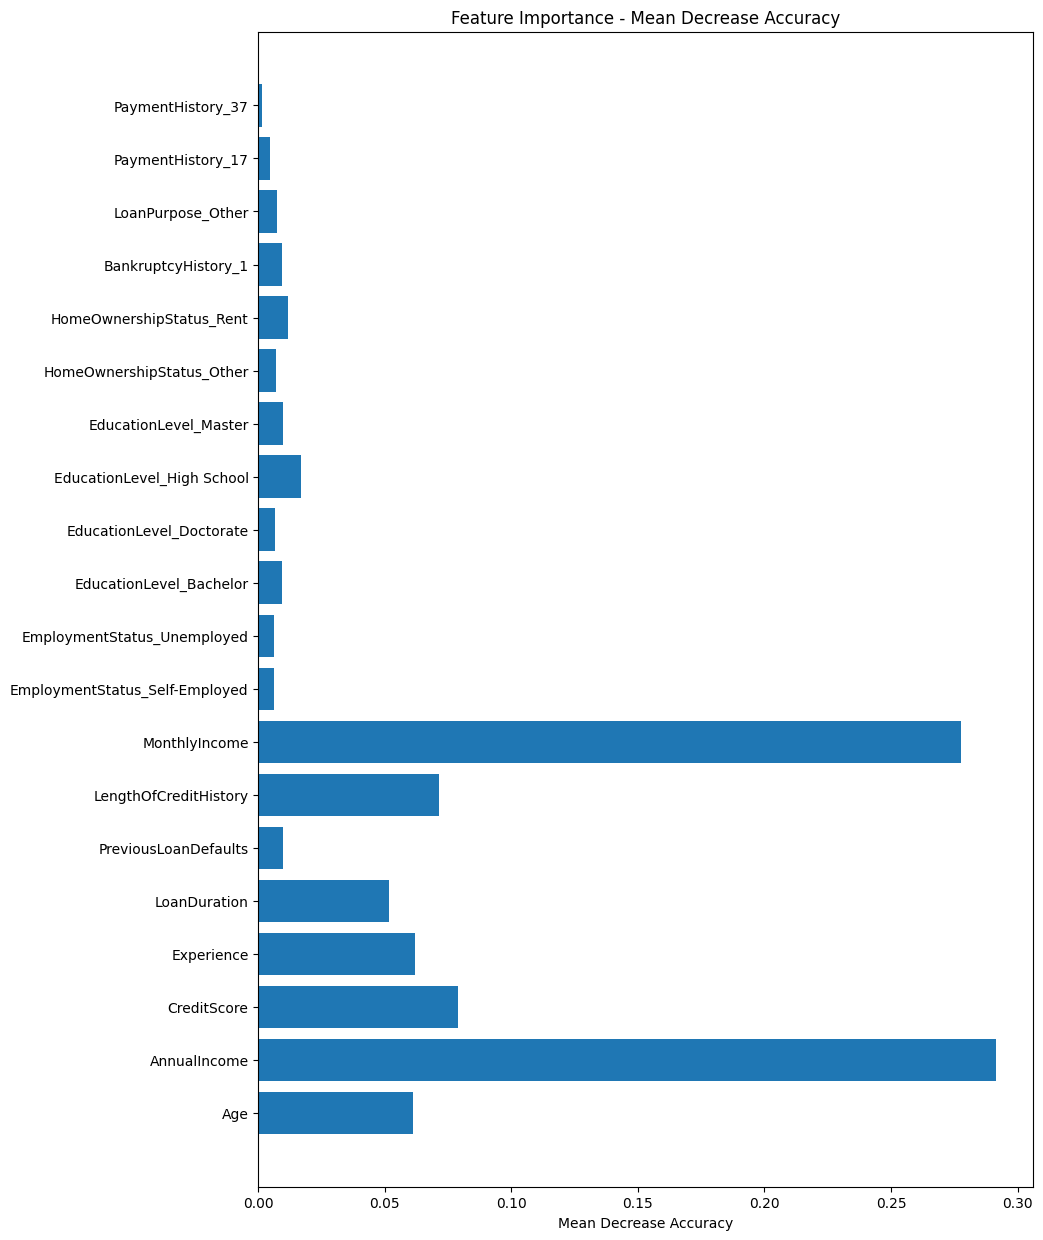

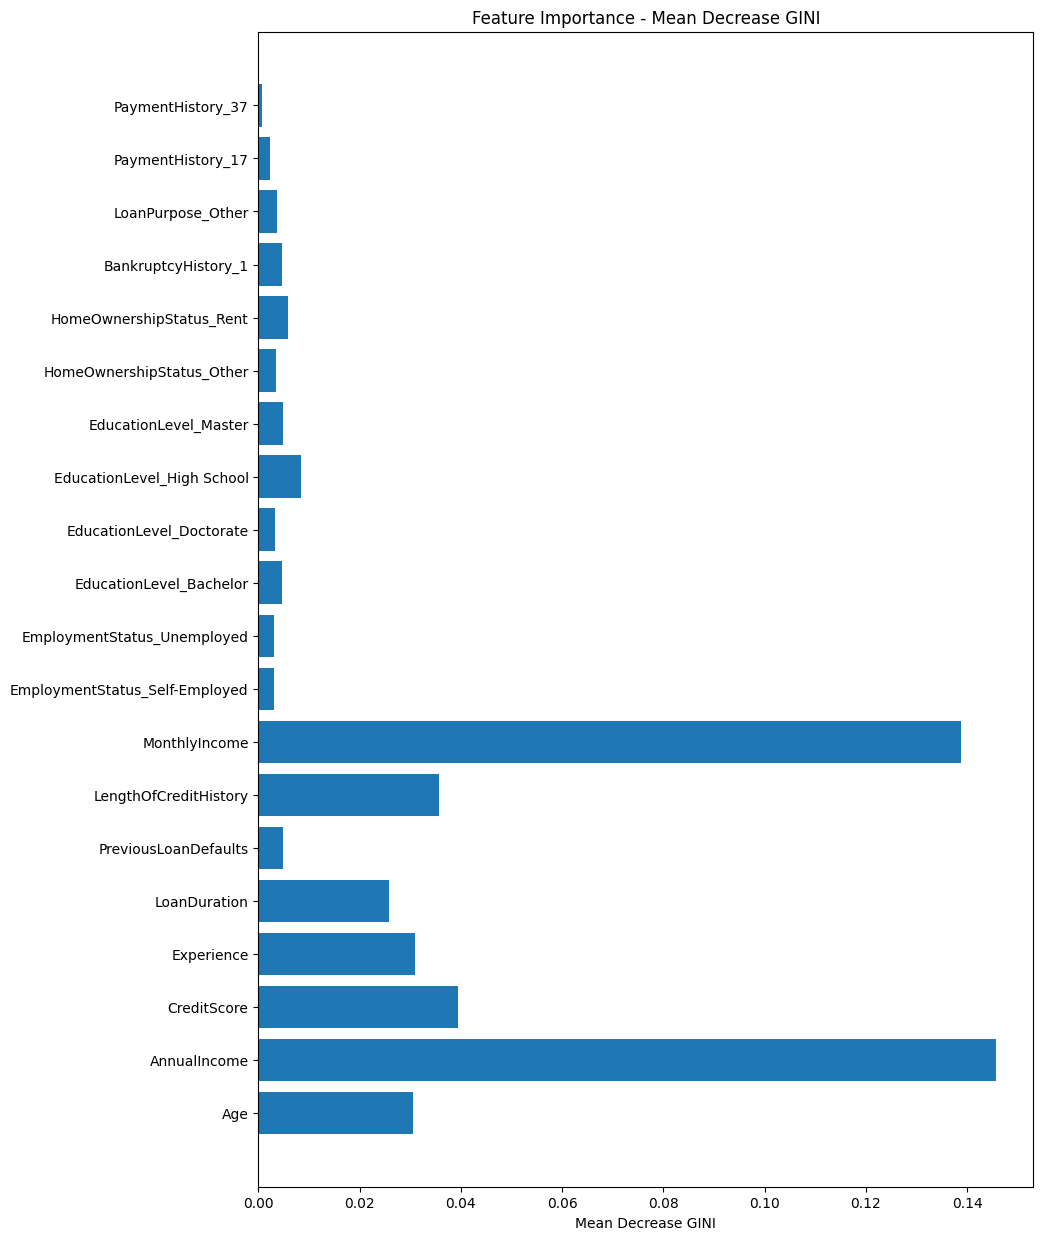

In [199]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 15))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()